Notebook setting up the diff eq for "understanding phase separation" section of Matt Pyle's thesis (eq 4.16)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [2]:
def syst(t, x, V = 10., dRdTA = 0.005, dRdTB = 0.5, C = 0.8, R0 = 10.):
    dTA, dTB = x

    RA = R0 + dRdTA*dTA
    RB = R0/2 + dRdTB*dTB

    coeff = V**2/C/(RA+RB)

    M = np.array([
        [(RB-RA)*dRdTA, -2*RB*dRdTB],
        [-2*RB*dRdTA, (RA-RB)*dRdTB]
    ])

    Tdot = coeff*np.matmul(M, x)

    return Tdot


In [11]:
soln = solve_ivp(syst, t_span = (0, 0.3), y0 = np.array([0.1, 0.]))
print(soln)

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 38
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.        , 0.02376288, 0.07445494, 0.13700862, 0.20414414,
       0.2707604 , 0.3       ])
 t_events: None
        y: array([[ 1.00000000e-01,  1.00086833e-01,  1.07120195e-01,
         1.52112216e-01,  3.69881808e-01,  1.31914888e+00,
         2.44791062e+00],
       [ 0.00000000e+00, -1.28034338e-03, -7.50805415e-03,
        -3.41452117e-02, -1.53335868e-01, -6.95720564e-01,
        -1.42292743e+00]])
 y_events: None


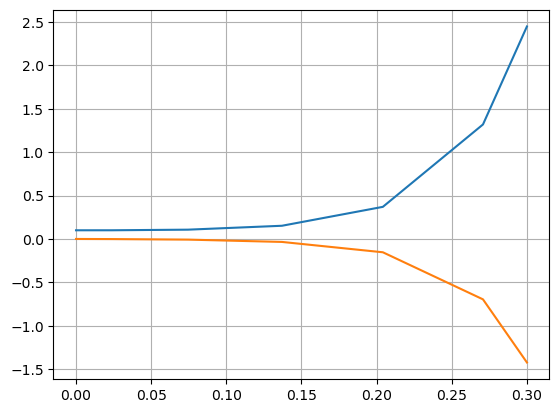

In [12]:
plt.figure()
plt.grid()

plt.plot(soln.t, soln.y[0], label = 'TA')
plt.plot(soln.t, soln.y[1], label = 'TB')